In [1]:
import gensim.downloader as api
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
print("Loading Word2Vec model...")
word2vec_model = api.load("word2vec-google-news-300")
print("Word2Vec loaded successfully!")

Loading Word2Vec model...
[===================================---------------] 71.5% 1188.2/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=====================================-------------] 74.2% 1233.4/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec loaded successfully!


In [3]:
similar_words = word2vec_model.most_similar("king", topn=5)

print("Top 5 words similar to 'king':")
for word, score in similar_words:
    print(f"{word} : {score:.4f}")

Top 5 words similar to 'king':
kings : 0.7138
queen : 0.6511
monarch : 0.6413
crown_prince : 0.6204
prince : 0.6160


In [4]:
analogy = word2vec_model.most_similar(
    positive=["king", "woman"],
    negative=["man"],
    topn=1
)
print("king - man + woman =")
print(analogy)

king - man + woman =
[('queen', 0.7118193507194519)]


In [5]:
print("Loading GloVe model...")
glove_model = api.load("glove-wiki-gigaword-300")
print("GloVe loaded successfully!")

Loading GloVe model...
[==================================================] 100.0% 376.1/376.1MB downloaded
GloVe loaded successfully!


In [6]:
print("Word2Vec Similar Words for 'king':")
print(word2vec_model.most_similar("king", topn=5))
print("\nGloVe Similar Words for 'king':")
print(glove_model.most_similar("king", topn=5))

Word2Vec Similar Words for 'king':
[('kings', 0.7138045430183411), ('queen', 0.6510956883430481), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204220056533813), ('prince', 0.6159993410110474)]

GloVe Similar Words for 'king':
[('queen', 0.6336469054222107), ('prince', 0.6196622848510742), ('monarch', 0.5899620652198792), ('kingdom', 0.5791266560554504), ('throne', 0.5606487989425659)]


In [7]:
words = [
    "king", "queen", "man", "woman",
    "prince", "princess",
    "dog", "cat",
    "apple", "orange"
]

In [8]:
vectors = np.array([word2vec_model[word] for word in words])
print("Shape of vectors:", vectors.shape)

Shape of vectors: (10, 300)


In [9]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)
print("Reduced shape:", reduced_vectors.shape)

Reduced shape: (10, 2)


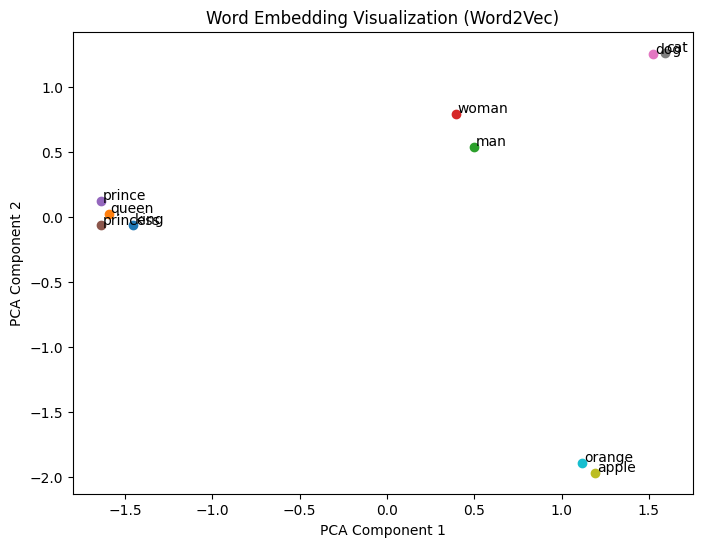

In [10]:
plt.figure(figsize=(8,6))

for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word)

plt.title("Word Embedding Visualization (Word2Vec)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()